## Computer Vision
### Module 4.  Geometry and Augmented Reality

#### Task 4.1: 
Draw cube in this way by changing view matrix only






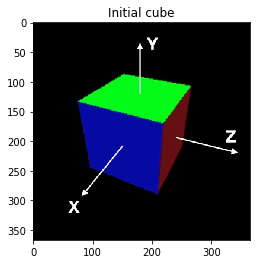

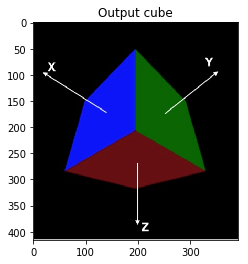

In [30]:
plt.figure(1)
img = cv2.imread('cube_initial.jpg',cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Initial cube')

plt.figure(2)
img = cv2.imread('cube_desirable_output.jpg',cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Output cube')
plt.show()

#### by Anastasiia Kasprova

    Link to Google Colab: https://colab.research.google.com/drive/1I9lxSV2SfV93Rd4nLJA2TR69NotKLXfj
    Link to github: https://github.com/kasprova/CV_UCU/tree/master/module4

In [0]:
# we need this to support OpenGL in Gooogle Colab
!pip install -q lucid>=0.2.3

In [0]:
import cv2
import numpy as np
import json
from google.colab import files
from math import *
import lucid.misc.io.showing as show
from lucid.misc.gl.glcontext import create_opengl_context
# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from matplotlib import pyplot as plt
%matplotlib inline


In [3]:
# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 512, 512
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 410.79'
b'NVIDIA Corporation'


In [0]:
def rotationX(rad):
  m = np.eye(4)
  c = np.cos(rad); s = np.sin(rad)
  m[1,1] = c;  m[1,2] = s
  m[2,1] = -s; m[2,2] = c
  return m

def rotationY(rad):
  m = np.eye(4)
  c = np.cos(rad); s = np.sin(rad)
  m[0,0] = c;  m[0,2] = s
  m[2,0] = -s; m[2,2] = c
  return m

def rotationZ(rad):
  m = np.eye(4)
  c = np.cos(rad); s = np.sin(rad)
  m[0,0] = c;  m[0,1] = s
  m[1,0] = -s; m[1,1] = c
  return m

def translate(v3):
  m = np.eye(4)
  m[0:3, 3] = v3
  return m

def scale(v3):
  m = np.eye(4)
  m[0, 0] = v3[0]
  m[1, 1] = v3[1]
  m[2, 2] = v3[2]
  return m

def norm(v):
  return v if np.linalg.norm(v)<0.000001 else v/np.linalg.norm(v)

def divW(v):
  return v/v[3]

In [0]:
def lookFromTo(pos, lookAt, up):
  d = norm(np.array(lookAt) - np.array(pos))
  r = norm(np.cross(np.array(up), d))
  u = norm(np.cross(d, r))
  m = np.eye(4)
  m[0, 0:3] = r
  m[1, 0:3] = u
  m[2, 0:3] = d
  return np.matmul(m, translate(-np.array(pos)) )


In [0]:
def projection_gl(alpha, znear, zfar):
  W = H = 2*znear*tan(alpha/2)
  m = np.zeros((4,4))
  m[0,0] = 2*znear/W
  m[1,1] = 2*znear/H
  m[2,2] = (zfar+znear)/(zfar-znear)
  m[2,3] = -2*zfar*znear/(zfar-znear)
  m[3,2] = 1
  m[3,3] = 0
  return m

def projection_pinhole(f, alpha):
  W = H = 2*f*tan(alpha/2)
  m = np.eye(4)
  m[0,0] = 2/W
  m[1,1] = 2/H
  m[3,2] = 1/f
  m[3,3] = 0
  return m

In [0]:
def cubeNormal(j):
  return np.array([ 0 if j//2!=0 else 2*(j%2-0.5), 0 if j//2!=1 else 2*(j%2-0.5), 0 if j//2!=2 else 2*(j%2-0.5) ])

def drawCube():
  for j in range(0, 6):
    n = cubeNormal(j)
    n2 = cubeNormal( (j+2)%6 )
    n3 = cubeNormal( (j+4)%6 )
    gl.glColor3fv( n if j%2==1 else (1.0+n) )
    gl.glBegin(gl.GL_QUADS)
    gl.glNormal3fv(n)
    gl.glVertex3fv(n+n2+n3)
    gl.glNormal3fv(n)
    gl.glVertex3fv(n+n2-n3)
    gl.glNormal3fv(n)
    gl.glVertex3fv(n-n2-n3)
    gl.glNormal3fv(n)
    gl.glVertex3fv(n-n2+n3)
    gl.glEnd()

# Enable depth testing
gl.glEnable(gl.GL_DEPTH_TEST)
# Enable lighting
gl.glEnable(gl.GL_LIGHTING)

# Set light model
gl.glLightModelfv(gl.GL_LIGHT_MODEL_AMBIENT, [0.4, 0.4, 0.4, 1.0])

# Enable light number 0
gl.glEnable(gl.GL_LIGHT0)

# Set position and intensity of light
gl.glLightfv(gl.GL_LIGHT0, gl.GL_POSITION, [2.0, 2.0, -1.0, 1.0])
gl.glLightfv(gl.GL_LIGHT0, gl.GL_DIFFUSE, [0.7, 0.7, 0.7, 1.0])

# # Enable light number 0
gl.glEnable(gl.GL_LIGHT1)

# # Set position and intensity of light
gl.glLightfv(gl.GL_LIGHT1, gl.GL_POSITION, [-2.0, -2.0, 1.0, 1.0])
gl.glLightfv(gl.GL_LIGHT1, gl.GL_DIFFUSE, [0.5, 0.5, 0.5, 1.0])

# Setup the material
gl.glEnable(gl.GL_COLOR_MATERIAL)
gl.glColorMaterial(gl.GL_FRONT, gl.GL_AMBIENT_AND_DIFFUSE)

# Set shade model
gl.glShadeModel(gl.GL_FLAT)



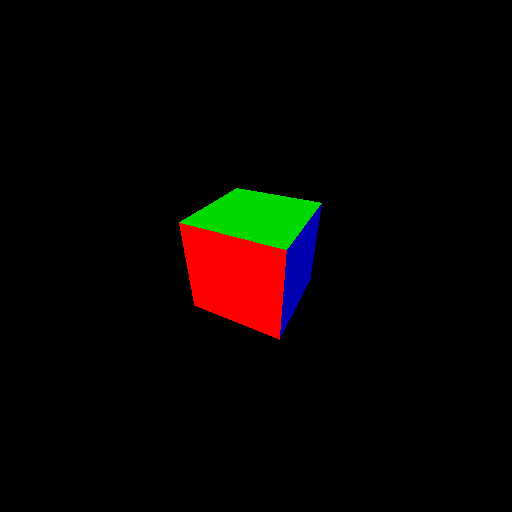

In [8]:
# Clear output buffer
gl.glClearColor(0.0, 0.0, 0.0, 0.0)
gl.glClear(gl.GL_COLOR_BUFFER_BIT | gl.GL_DEPTH_BUFFER_BIT)

# Set projection matrix
gl.glMatrixMode(gl.GL_PROJECTION)
gl.glLoadMatrixf( projection_gl(pi/2, 1, 10).T )

# Set world->camera metrix
gl.glMatrixMode(gl.GL_MODELVIEW)
gl.glLoadMatrixf( lookFromTo([4,3,2], [0,0,0], [0,1,0]).T )

# Draw cube
drawCube()

# Read the result
img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)


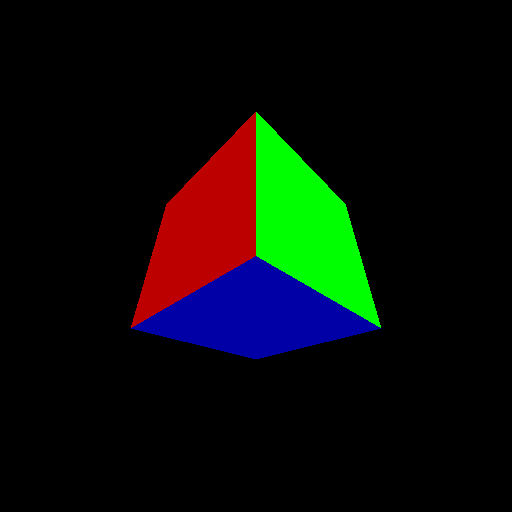

In [11]:
# Clear output buffer
gl.glClearColor(0.0, 0.0, 0.0, 0.0)
gl.glClear(gl.GL_COLOR_BUFFER_BIT | gl.GL_DEPTH_BUFFER_BIT)

# Set projection matrix
gl.glMatrixMode(gl.GL_PROJECTION)
gl.glLoadMatrixf( projection_gl(pi/2, 1, 10).T )

# Set world->camera metrix
gl.glMatrixMode(gl.GL_MODELVIEW)

#NB!pos = changed, lookAt = const, up = changed
gl.glLoadMatrixf( lookFromTo([2,2,2], [0,0,0], [1,1,0]).T )

# Draw cube
drawCube()

# Read the result
img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)

Conclusion: to rotate the coordinate system we need to pay attention to pos and up vectors values